In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("my_movies.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
df.shape

(10, 15)

In [6]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

V1
Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

V2
Patriot          6
LOTR2            1
LOTR             1
LOTR1            1
Harry Potter2    1
Name: V2, dtype: int64

V3
Sixth Sense      4
Gladiator        1
Braveheart       1
Harry Potter1    1
Name: V3, dtype: int64

V4
Green Mile    2
Name: V4, dtype: int64

V5
LOTR2    1
Name: V5, dtype: int64

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [9]:
df2 = df.iloc[:,5:]

In [10]:
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


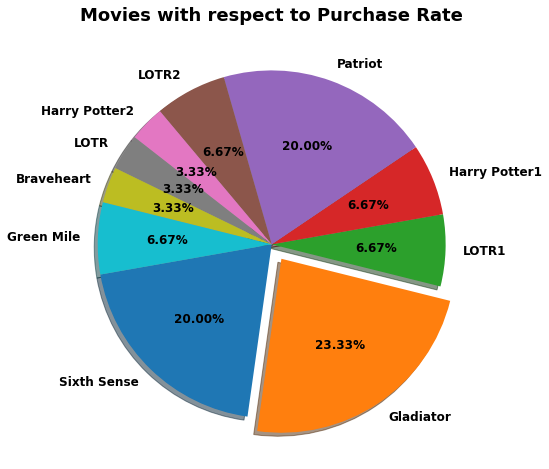

In [11]:
plt.figure(figsize = (12,8))
plt.pie(df2.sum(),
       labels=df2.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Movies with respect to Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [12]:
# most popular items
count = df2.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [13]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


Text(0.5, 1.0, 'Books Purchase Frequency')

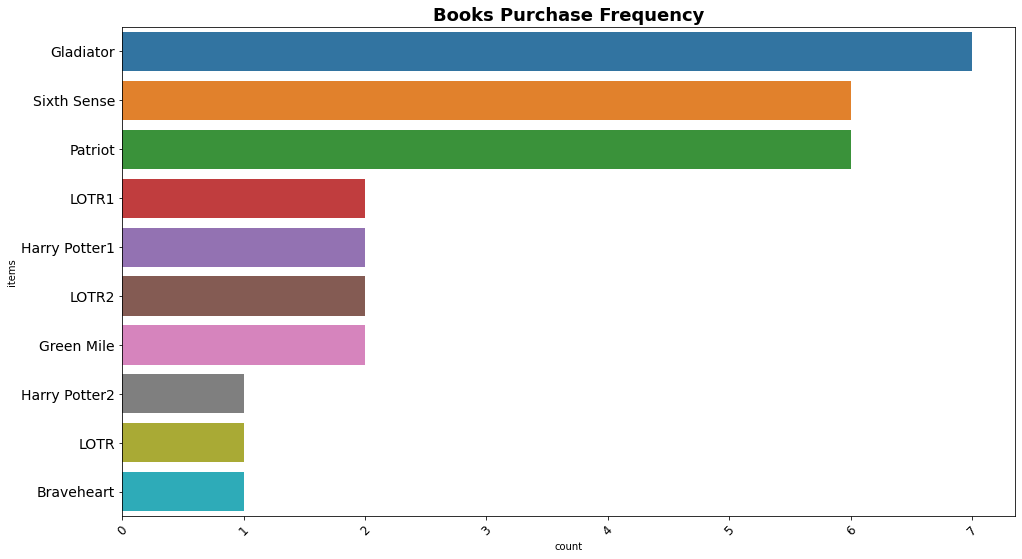

In [14]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')


## Applying Apriori Algoritm at min_support =0.1 and Confidence = 0.7

In [15]:
movie_itemset1 = apriori(df2,min_support=0.1,use_colnames=True)
movie_itemset1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
movie_rule1 = association_rules(movie_itemset1,metric="confidence",min_threshold=0.9)
movie_rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


# Top 10 Movies to recommend

In [17]:
movie_rule1.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
74,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
90,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
89,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
88,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
83,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
82,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
81,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
80,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
73,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
lift_greater_one1 = movie_rule1[movie_rule1.lift>1]
lift_greater_one1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [19]:
matrix1 = movie_rule1.pivot('antecedents','consequents','lift')
matrix1

consequents,(Sixth Sense),"(Green Mile, LOTR2, Sixth Sense)",(LOTR1),"(Green Mile, LOTR2, LOTR1)","(Green Mile, LOTR1, Harry Potter1)","(Green Mile, LOTR2)","(Green Mile, Harry Potter1)","(Green Mile, LOTR1)","(Sixth Sense, Harry Potter1)","(LOTR2, Sixth Sense)",...,(Green Mile),(Patriot),"(Green Mile, Sixth Sense, LOTR1)",(Harry Potter1),"(Sixth Sense, LOTR1, Harry Potter1)",(LOTR2),"(LOTR2, Sixth Sense, LOTR1)",(Gladiator),"(Green Mile, Gladiator, Sixth Sense)","(Green Mile, LOTR2, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(LOTR),1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,10.0,NaN
"(Green Mile, Gladiator, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Green Mile, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN
"(Gladiator, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, Sixth Sense, Harry Potter1)",NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, Sixth Sense, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1, Harry Potter1)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, LOTR1, Harry Potter1)",NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
"(Green Mile, Sixth Sense, Harry Potter1)",NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


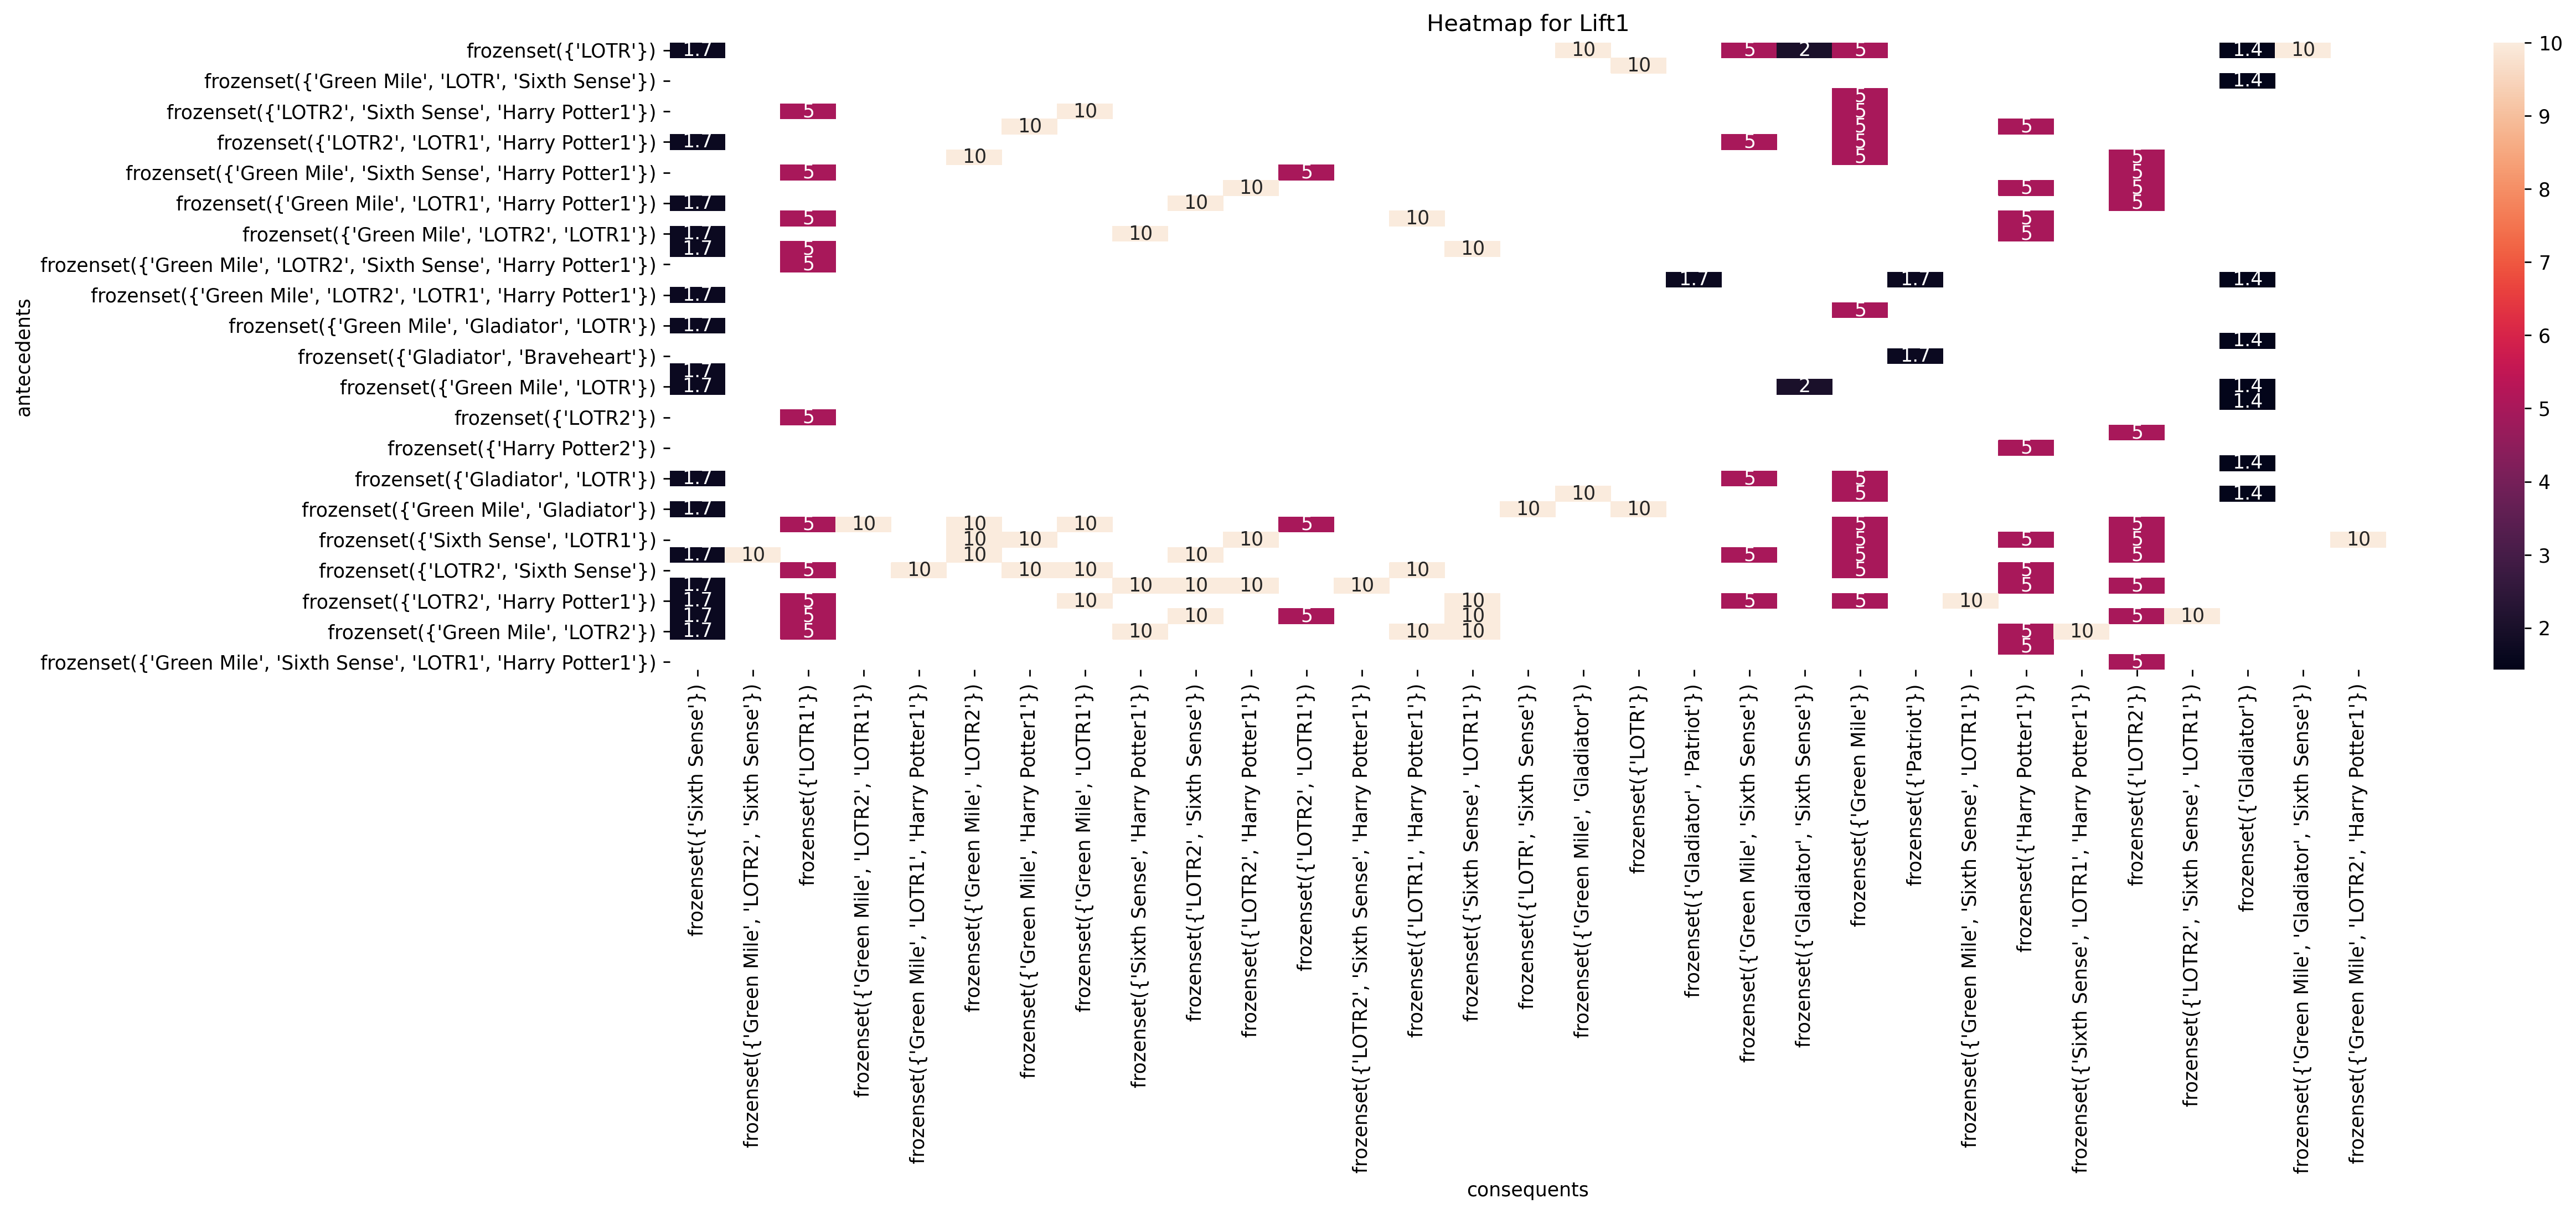

In [20]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix1,annot=True)
plt.title("Heatmap for Lift1")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

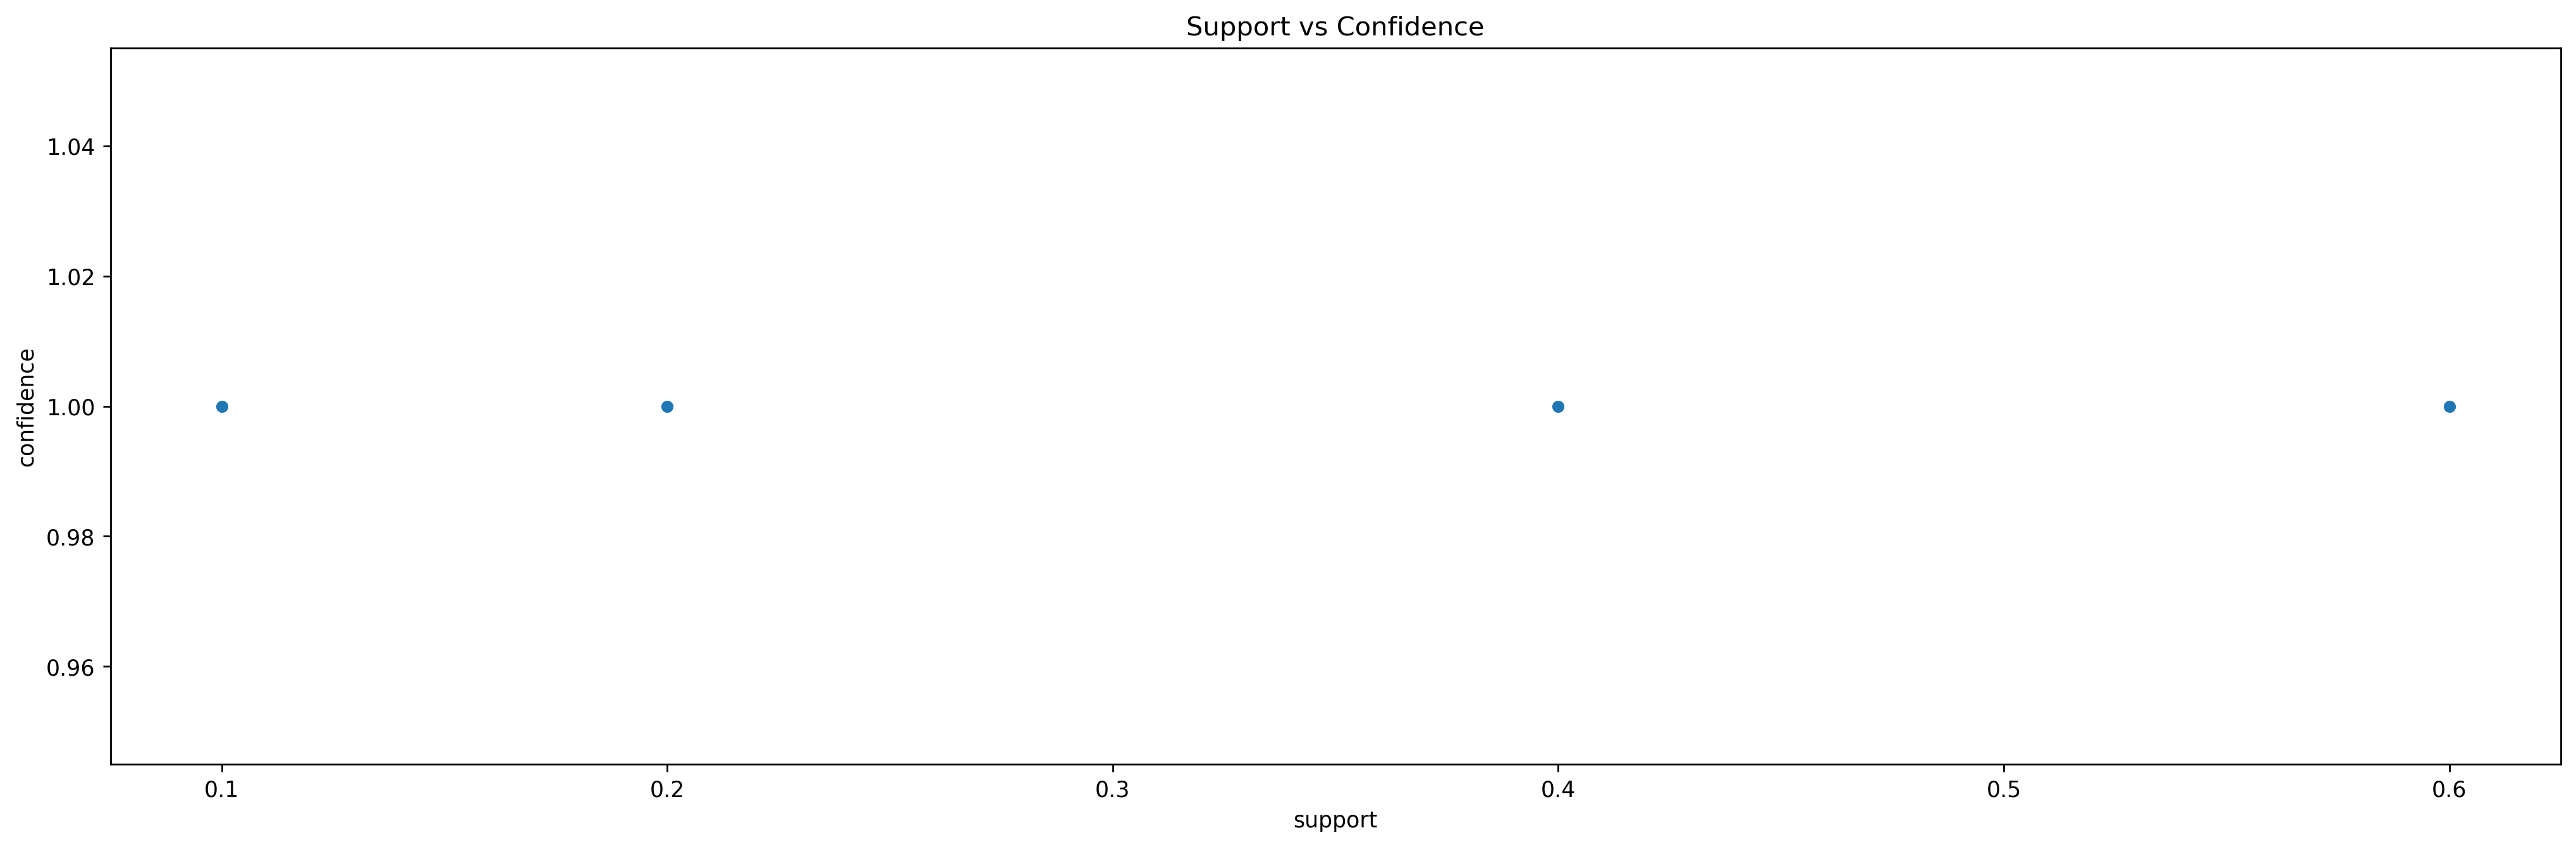

In [21]:
plt.figure(figsize=(20,6),dpi=250)
sns.scatterplot('support','confidence',data=lift_greater_one1)
plt.title("Support vs Confidence")
plt.show()

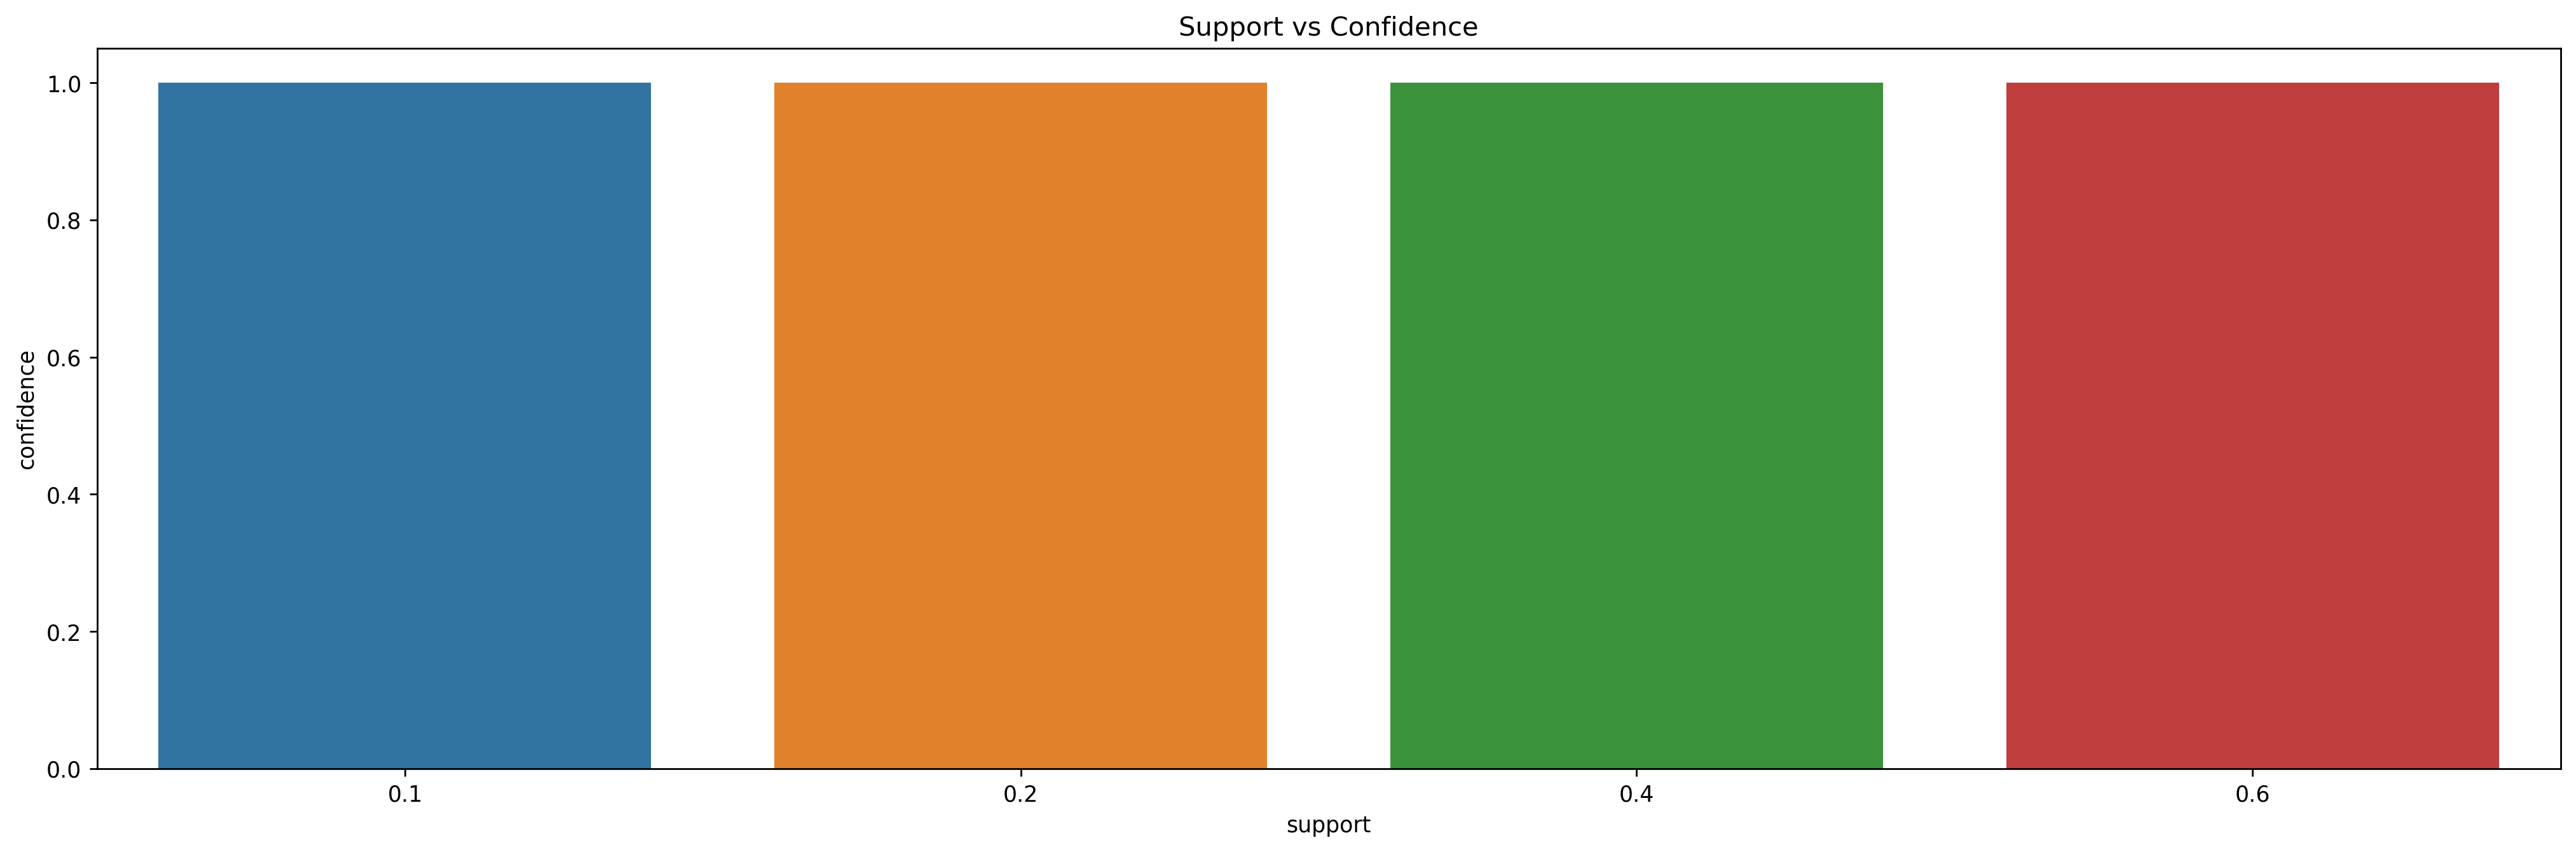

In [22]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot('support','confidence',data=lift_greater_one1)
plt.title("Support vs Confidence")
plt.show()

# Summarize:
As we can see at min_support=10% and confidence = 70% we found the top 10 movies in most of the cases we see that those who watch LOTR there is an high chance is there they can watch others movies as well

## Applying Apriori Algorithm at min_support = 0.2 and confidence = 0.8

In [23]:
movie_itemset2 = apriori(df2,min_support=0.2,use_colnames=True)
movie_itemset2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [24]:
movie_rule2=association_rules(movie_itemset2,metric='confidence',min_threshold=0.8)
movie_rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [25]:
lift_greater_one2=movie_rule2[movie_rule2.lift>1]
lift_greater_one2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [26]:
matrix2 = lift_greater_one2.pivot('antecedents','consequents','lift')
matrix2

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR1),(LOTR2)
antecedents,,,,,
(Sixth Sense),1.190476,NaN,NaN,NaN,NaN
(Green Mile),NaN,1.666667,NaN,NaN,NaN
(Gladiator),NaN,NaN,1.428571,NaN,NaN
(Patriot),1.428571,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN
"(Patriot, Sixth Sense)",1.428571,NaN,NaN,NaN,NaN


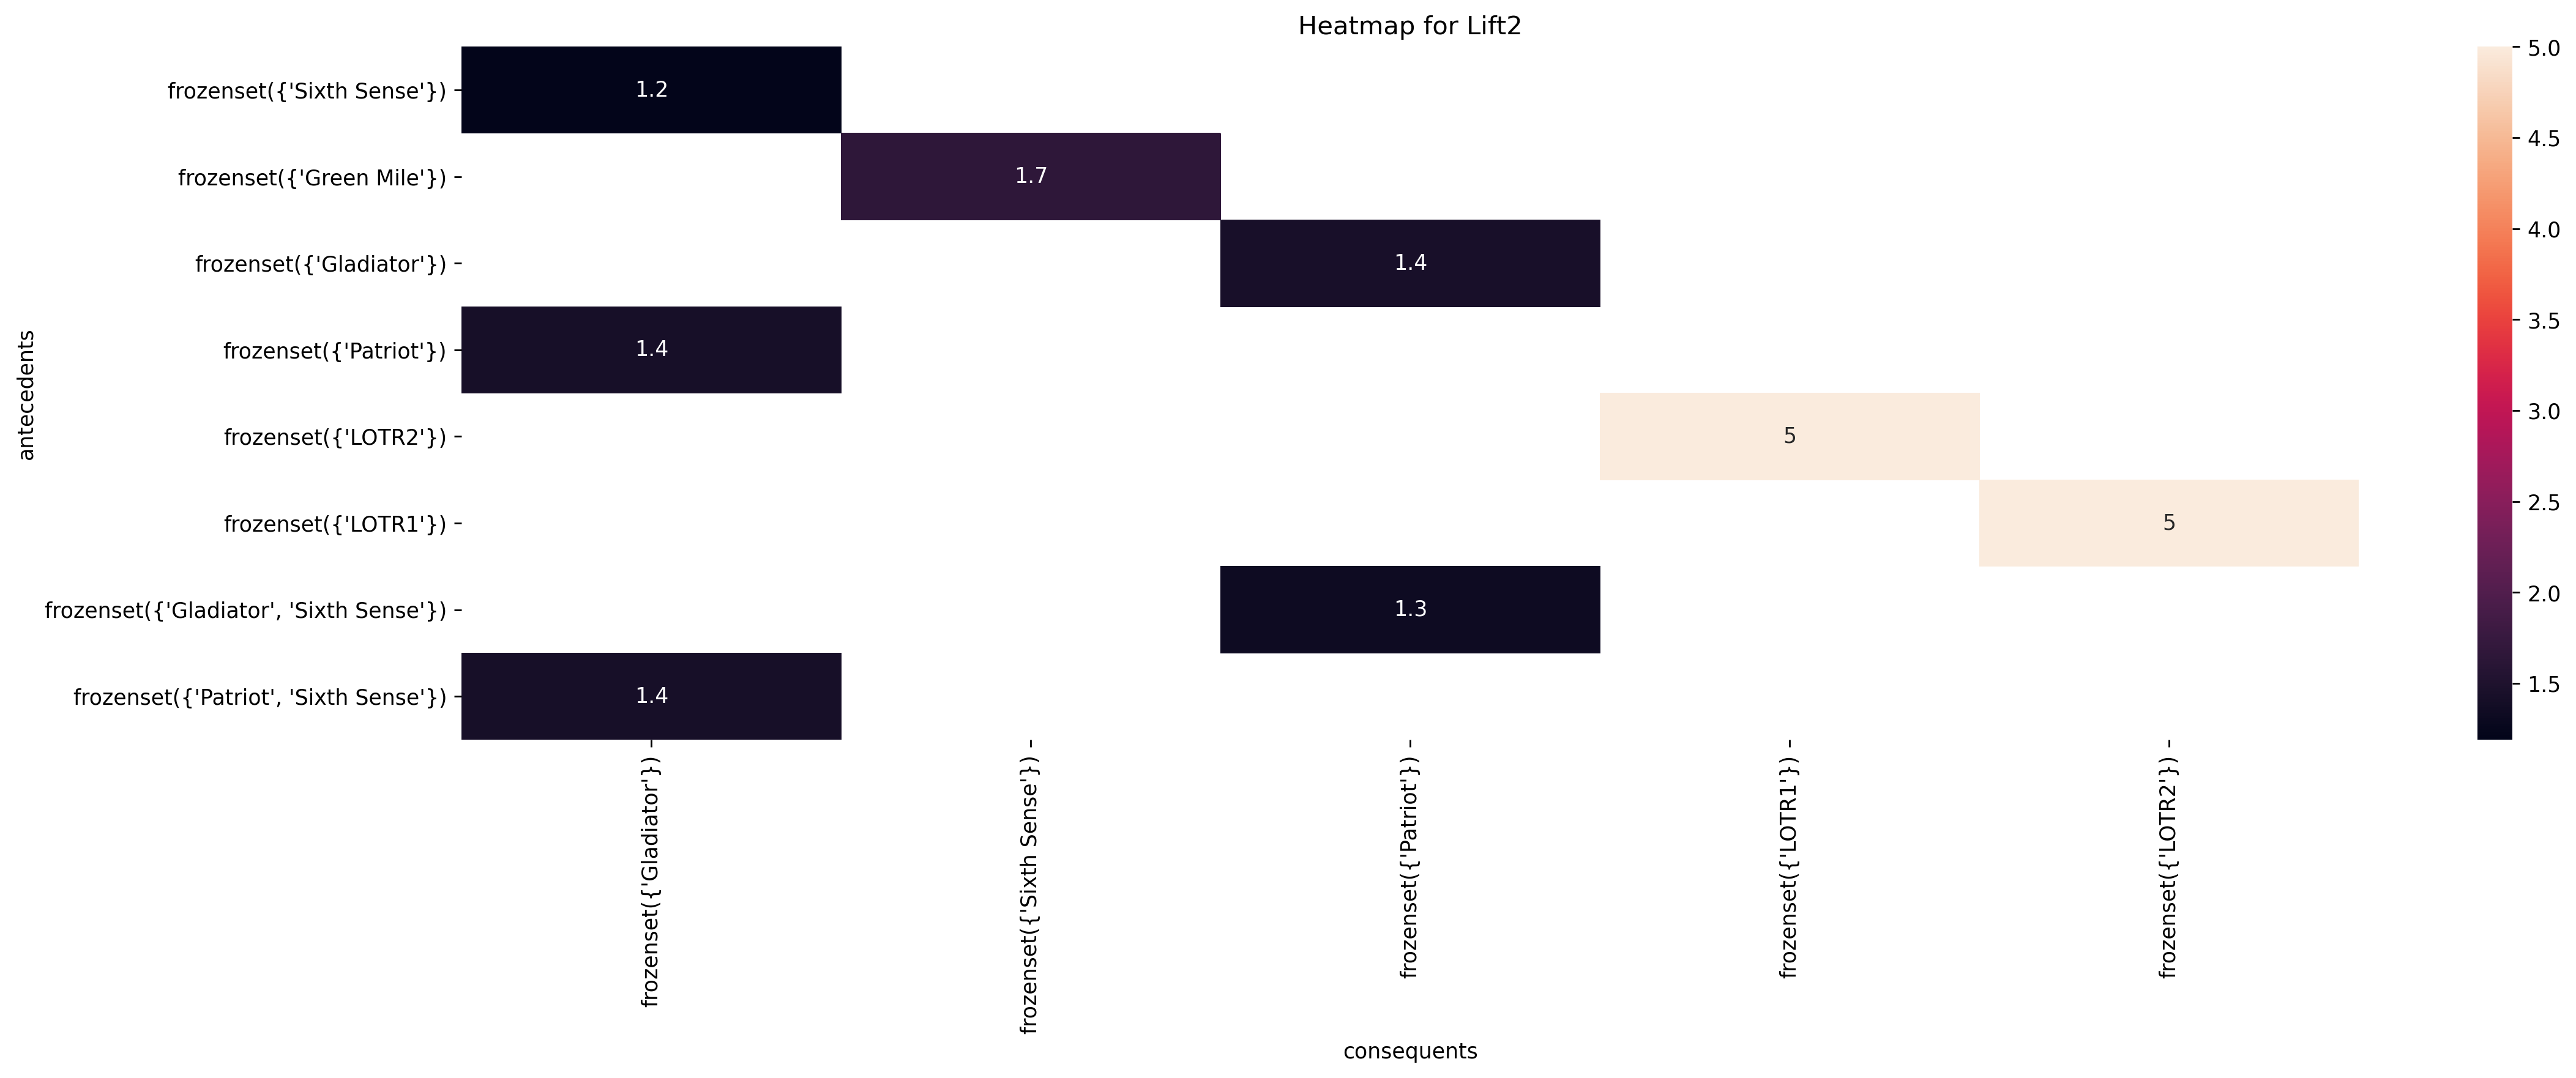

In [27]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix2,annot=True)
plt.title("Heatmap for Lift2")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

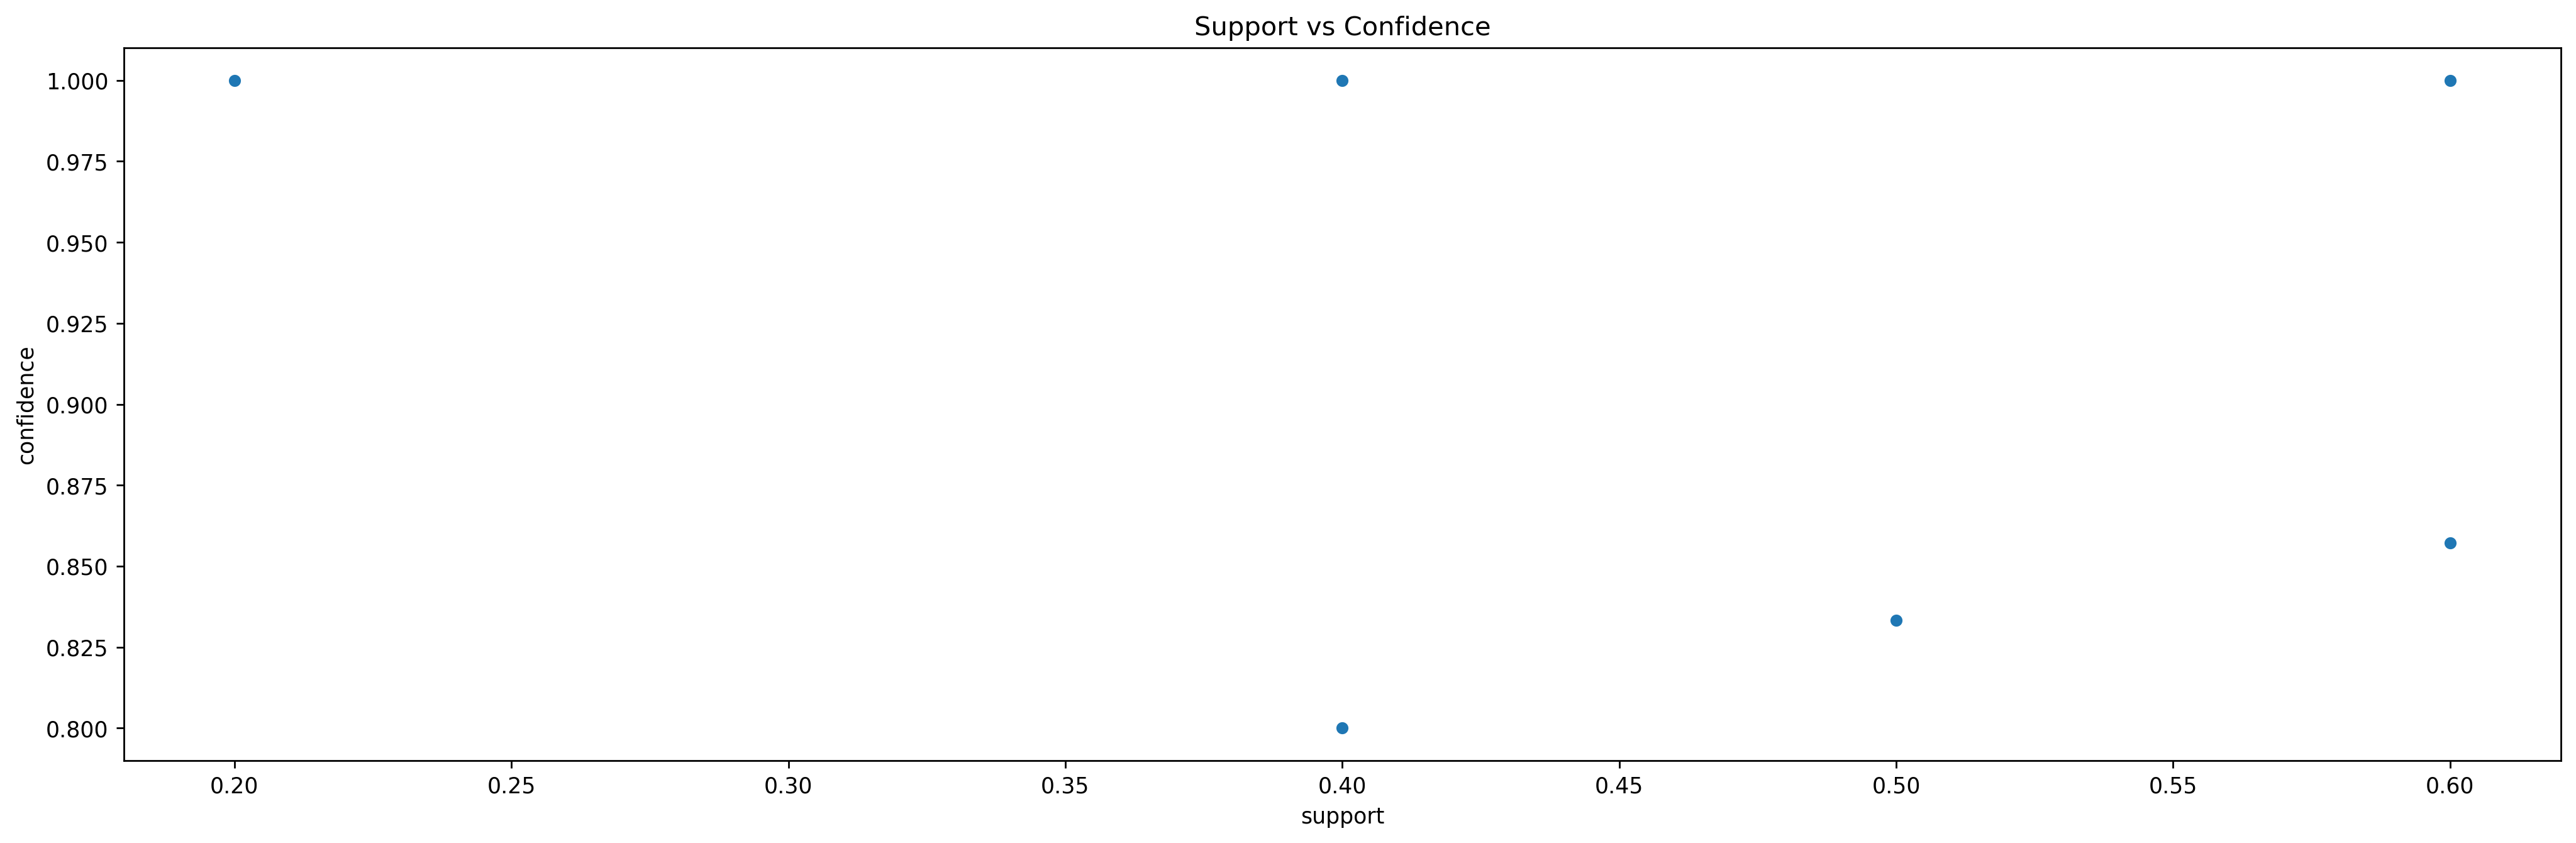

In [28]:
plt.figure(figsize=(20,6),dpi=250)
sns.scatterplot("support",'confidence',data=lift_greater_one2)
plt.title("Support vs Confidence")
plt.show()

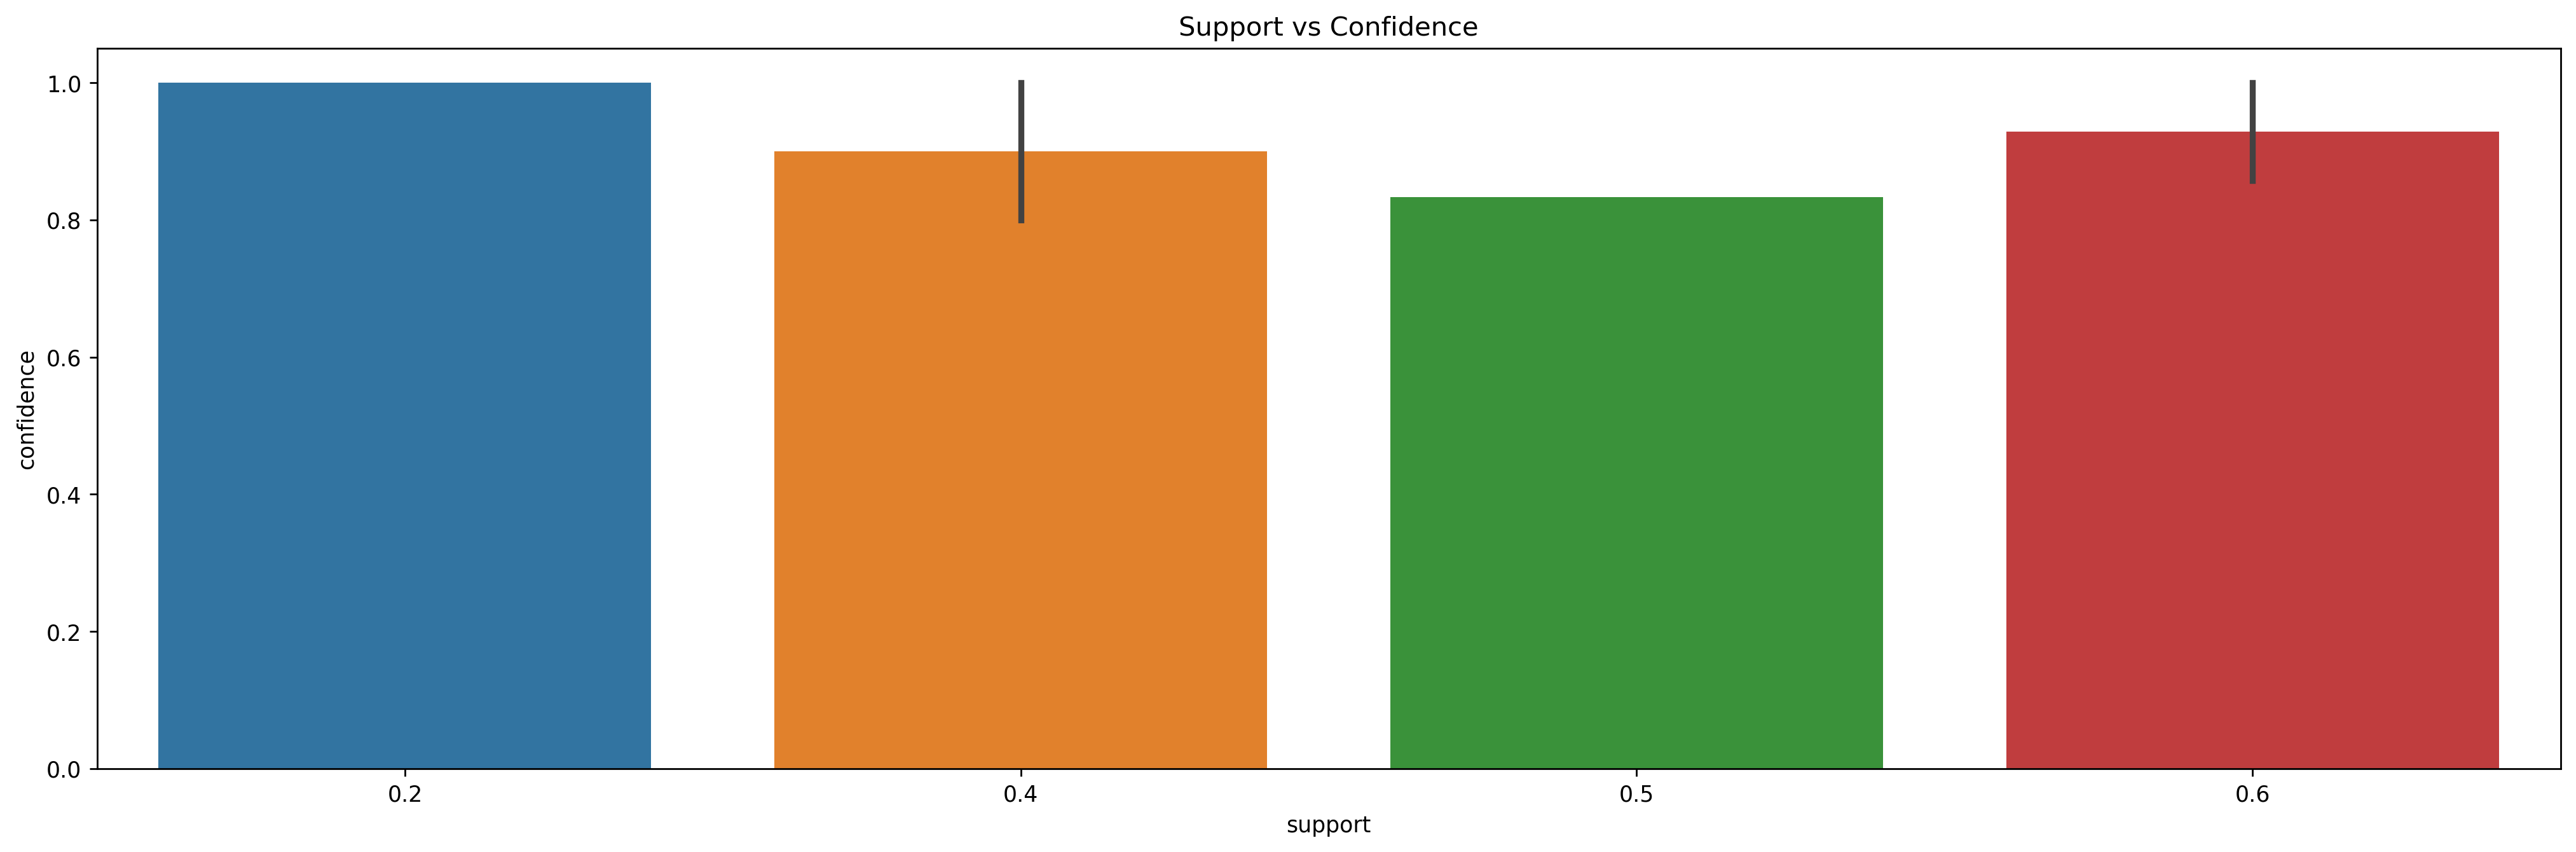

In [29]:
plt.figure(figsize =(20,6),dpi=250)
sns.barplot("support","confidence",data=lift_greater_one2)
plt.title("Support vs Confidence")
plt.show()

# Summarize:
As we can see that at min_support=0.2 and confidence=0.8 we can see that those who watched LOTR1 there is an high chance is there they can watch LOTR2 as well and those who watched Patriot,sixthsense they can watch Gladiator as well and those watch Green mile there is high chance is there they will watch sixth sense as well

## Applying Apriori Algorithm at min_support=0.25 and confidence =0.75

In [30]:
movie_itemset3 = apriori(df2,min_support=0.25,use_colnames=True)
movie_itemset3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Patriot, Sixth Sense)"


In [31]:
movie_rule3=association_rules(movie_itemset3,metric='confidence',min_threshold=0.75)
movie_rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [32]:
lift_greater_one3 = movie_rule3[movie_rule3.lift>1]
lift_greater_one3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [33]:
matrix3=lift_greater_one3.pivot('antecedents','consequents','lift')
matrix3

consequents,(Gladiator),(Patriot)
antecedents,,
(Sixth Sense),1.190476,NaN
(Gladiator),NaN,1.428571
(Patriot),1.428571,NaN
"(Gladiator, Sixth Sense)",NaN,1.333333
"(Patriot, Sixth Sense)",1.428571,NaN


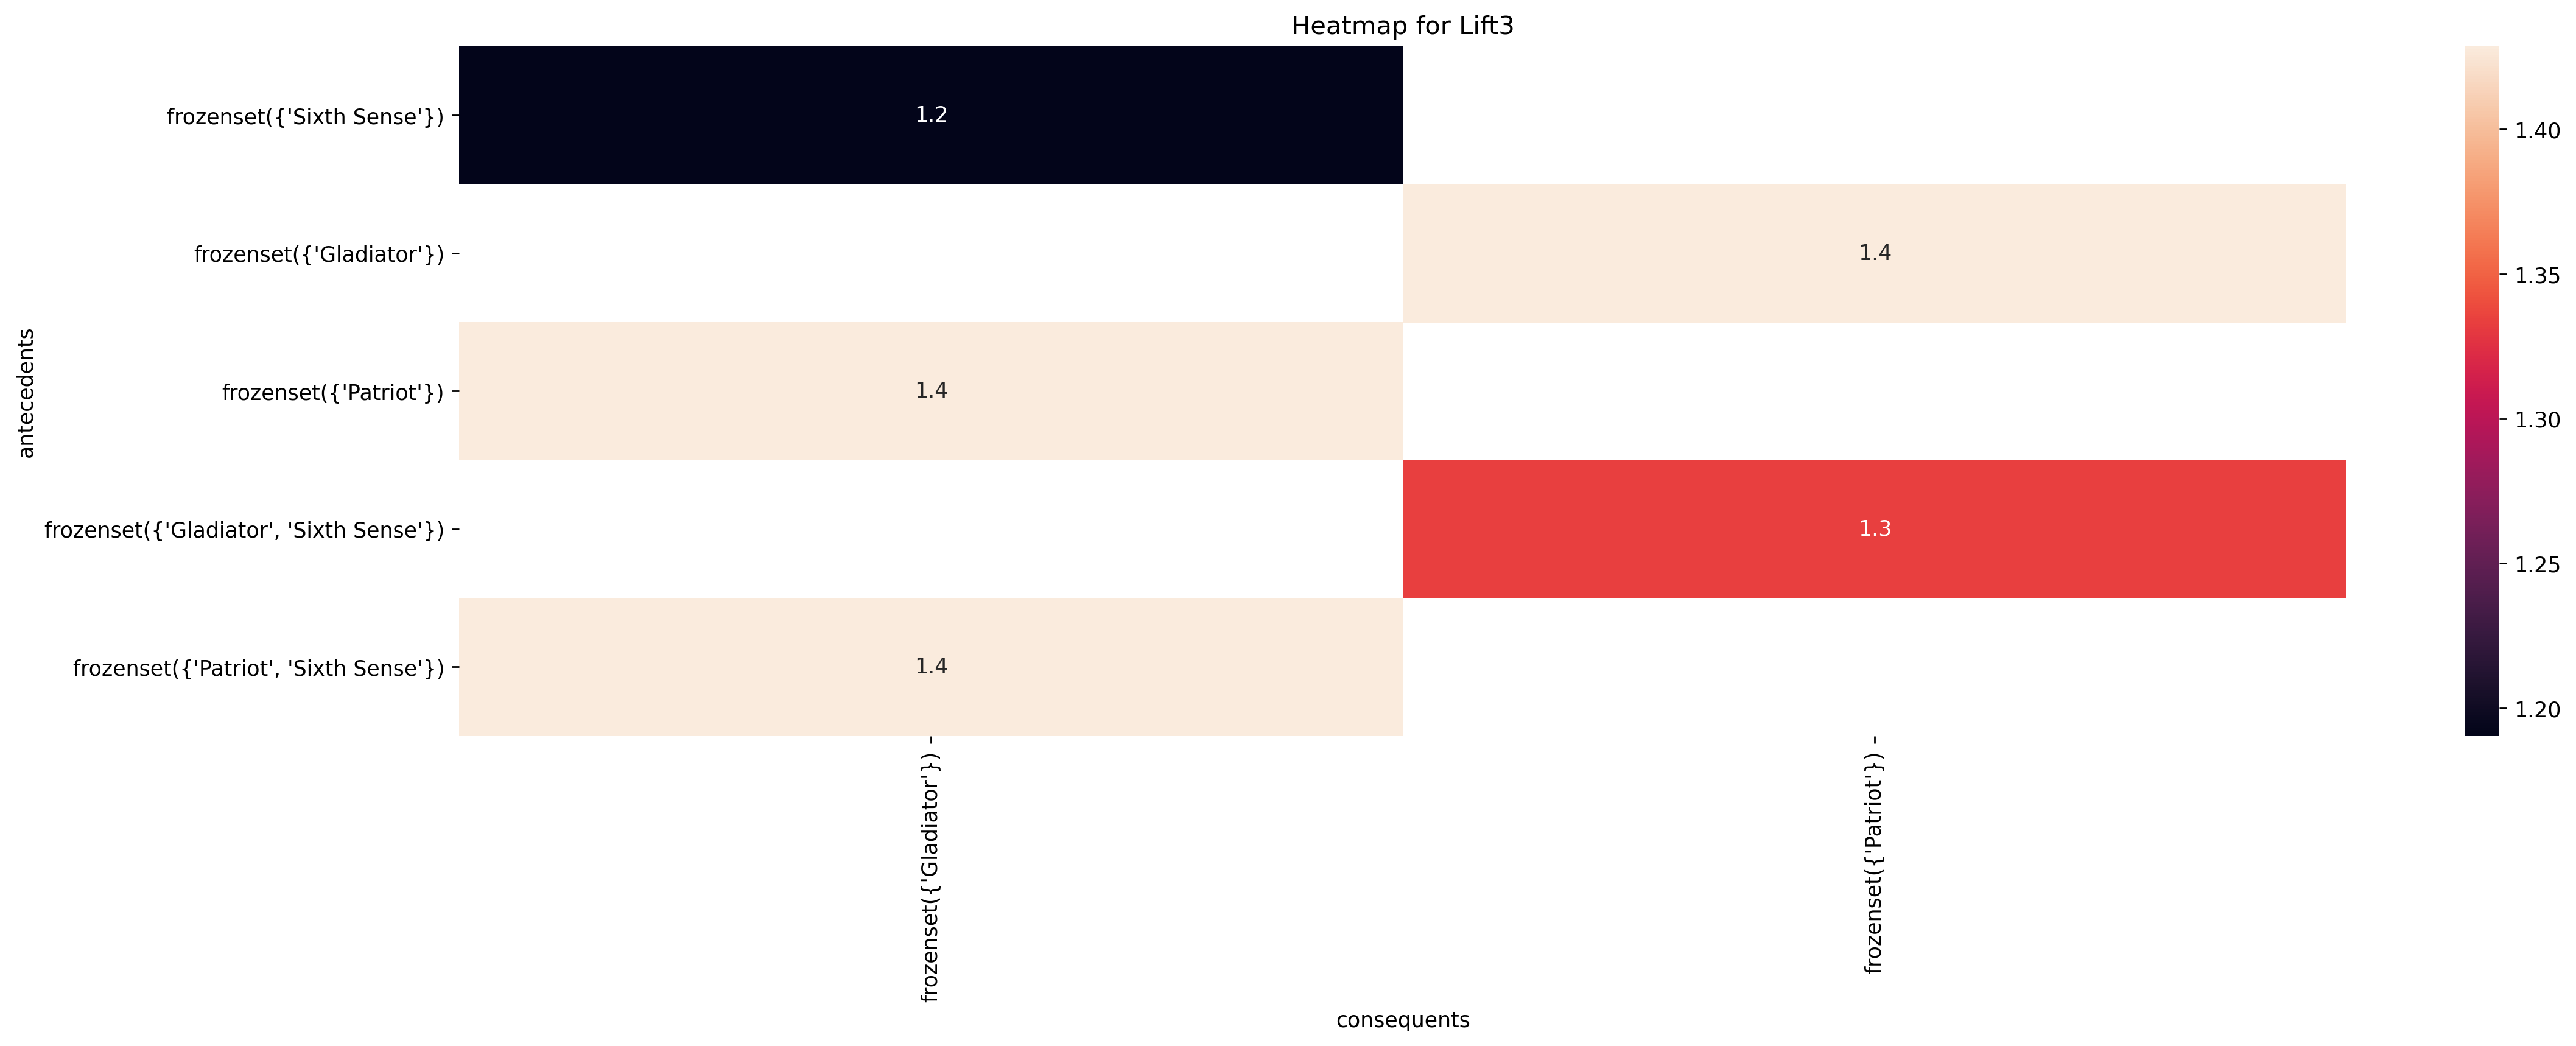

In [34]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix3,annot=True)
plt.title("Heatmap for Lift3")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

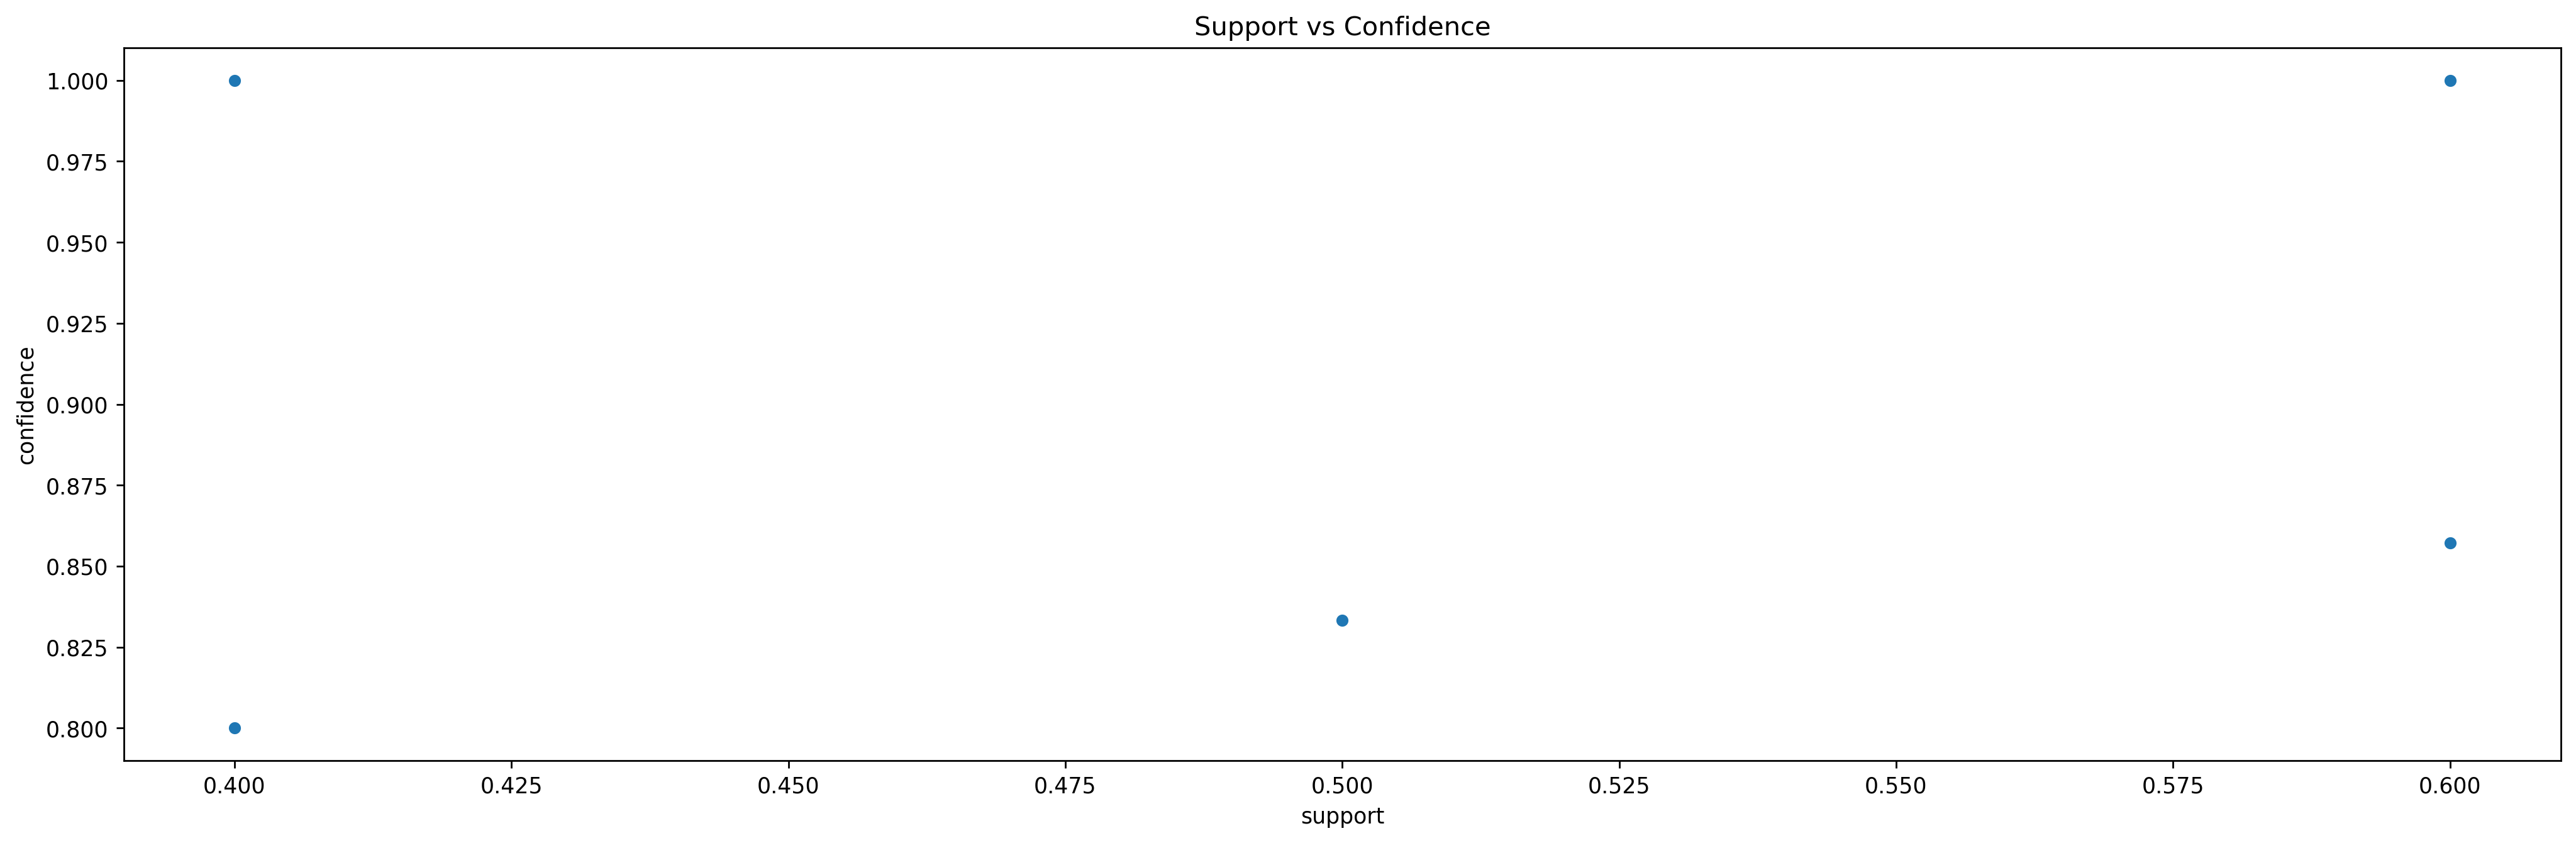

In [35]:
plt.figure(figsize=(20,6),dpi=250)
sns.scatterplot("support",'confidence',data=lift_greater_one3)
plt.title("Support vs Confidence")
plt.show()

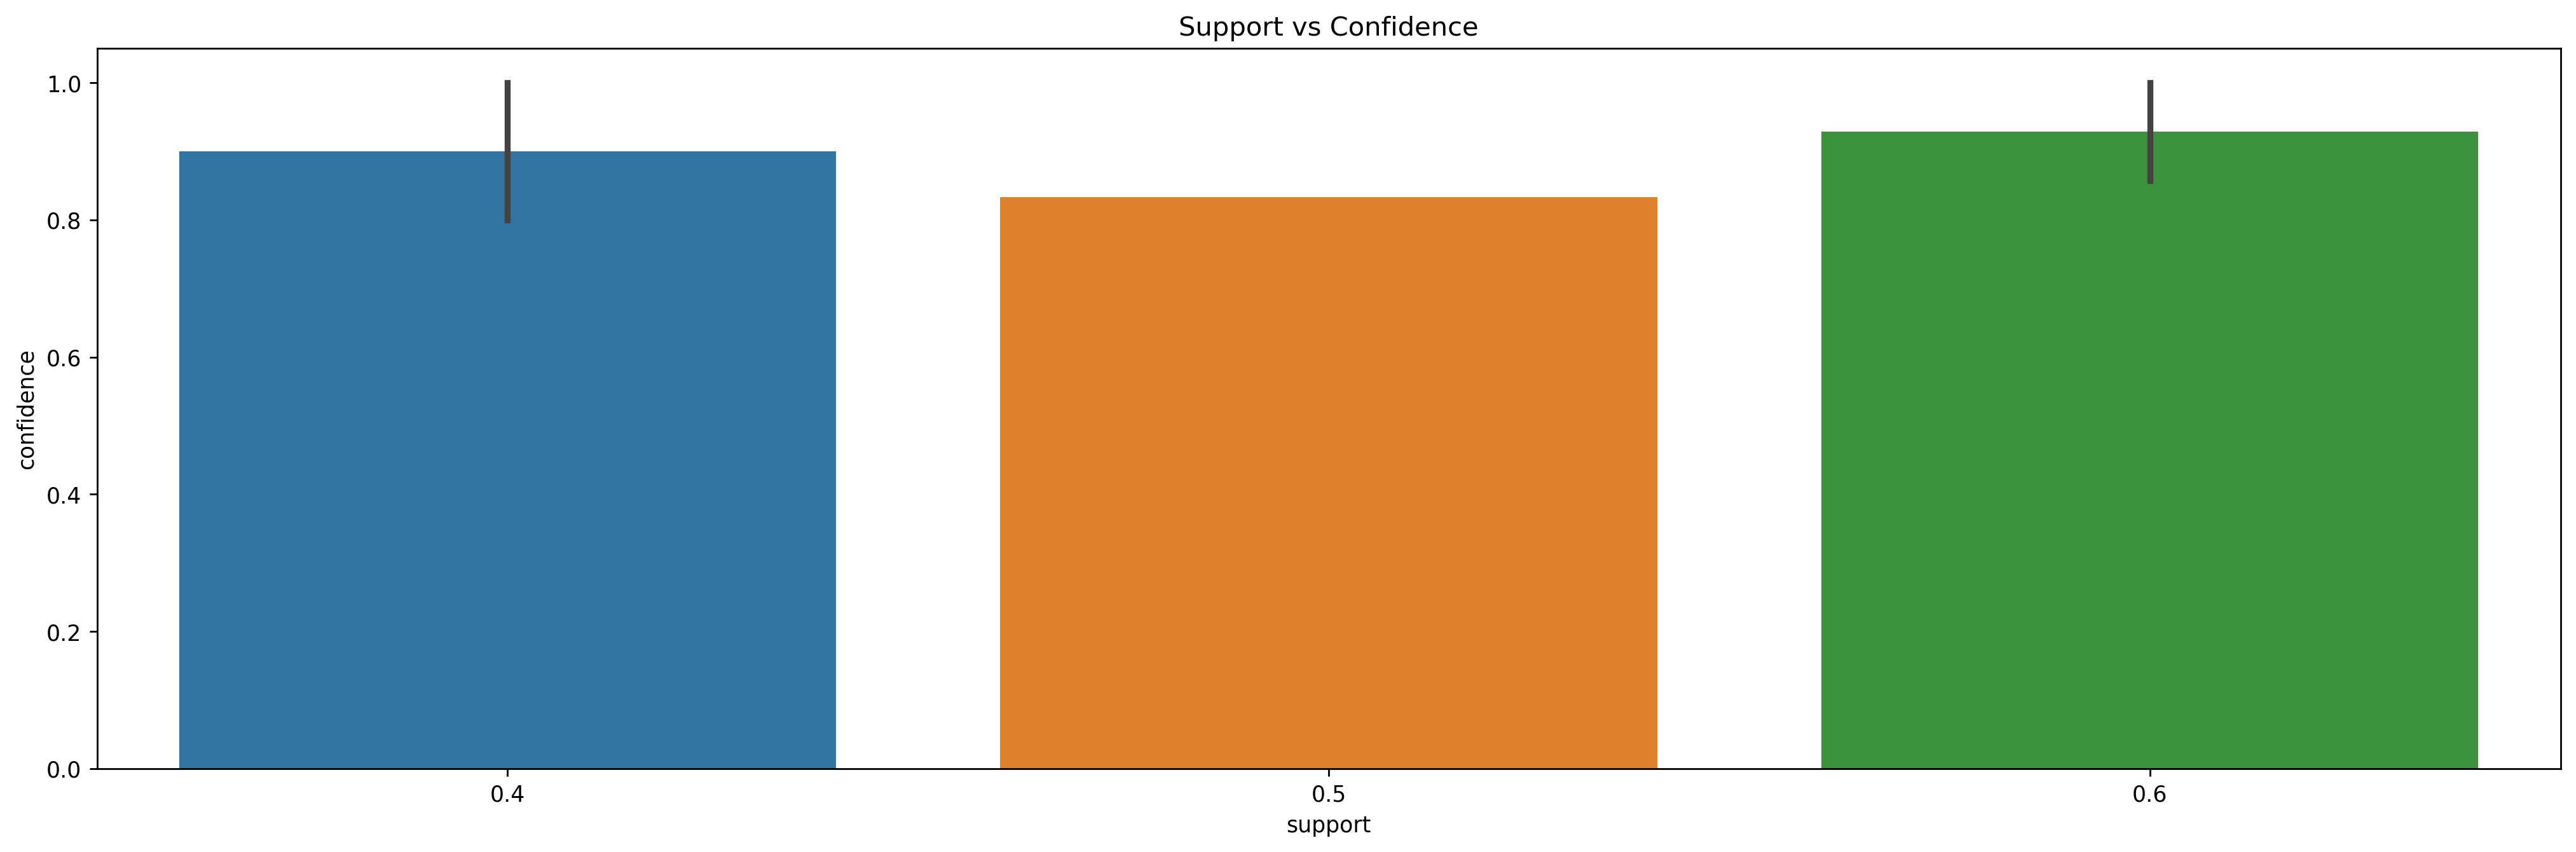

In [36]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support",'confidence',data=lift_greater_one3)
plt.title("Support vs Confidence")
plt.show()

# Summarize:
As we can see that at min_support=25% and confidence=75% those watch Patriot there is an high chance is there they can watch Gladiator as well and those who watch Patriot,Sixth sense there is high chance is there they can watch Gladiator as well